In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

import math
from qiskit.tools.visualization import plot_histogram

In [2]:
q = QuantumRegister(5)
c = ClassicalRegister(5)

In [3]:
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])
circuit.h(q[4])
# circuit.h(q[5])
# circuit.h(q[6])
# circuit.h(q[7])

circuit.draw()

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ H ├
      ├───┤
q0_2: ┤ H ├
      ├───┤
q0_3: ┤ H ├
      ├───┤
q0_4: ┤ H ├
      └───┘
c0: 5/═════

Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


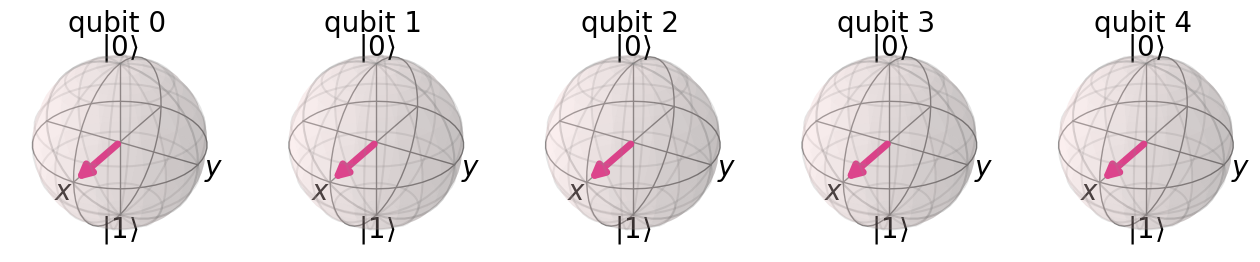

In [4]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [5]:
circuit.measure(q, c)
circuit.draw()

┌───┐┌─┐            
q0_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
q0_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
q0_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
q0_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
c0: 5/══════╩══╩══╩══╩══╩═
            0  1  2  3  4

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024, memory=True) # memory=True
result = job.result()
counts = result.get_counts()
print(counts)

{'00111': 34, '01000': 28, '00000': 34, '00110': 28, '11100': 40, '11011': 36, '11110': 30, '11000': 37, '10011': 32, '01010': 37, '11010': 40, '00100': 33, '10101': 32, '01111': 26, '01011': 33, '01001': 30, '10000': 31, '00011': 44, '11101': 36, '10001': 26, '00010': 24, '10110': 25, '01100': 36, '10100': 44, '01101': 27, '00101': 29, '10111': 24, '10010': 22, '11111': 31, '11001': 31, '01110': 30, '00001': 34}


In [7]:
# use memory
mem = result.get_memory()
print(mem)

# result_5bits = []
# for seq in mem:
# #     result_5bits.append(int(seq[0])*128 + int(seq[1])*64 + int(seq[2])*32 + int(seq[3])*16 + int(seq[4])*8 + int(seq[5])*4 + int(seq[6])*2 + int(seq[7])*1)
#     result_5bits.append(int(seq[0])*16 + int(seq[1])*8 + int(seq[2])*4 + int(seq[3])*2 + int(seq[4])*1)
    
# print(result_5bits)

['00111', '00000', '01000', '00110', '00000', '11100', '11011', '11110', '11000', '10011', '01010', '11010', '00100', '00000', '00100', '00111', '01000', '10101', '00110', '01111', '01011', '00000', '11010', '01001', '11100', '10000', '11110', '00011', '00011', '11101', '00011', '11010', '11011', '10001', '00010', '10110', '01010', '10001', '01010', '01100', '10100', '00100', '00000', '11000', '10001', '01101', '11011', '10110', '00101', '01000', '11100', '01101', '10001', '10100', '01011', '10001', '10111', '00110', '11100', '10001', '00111', '10010', '11100', '11011', '11111', '10100', '11010', '11110', '00010', '10100', '10100', '11000', '10011', '01111', '01001', '00100', '01010', '11011', '10010', '11000', '10011', '00110', '10111', '10000', '01101', '10110', '00110', '01111', '11011', '10111', '01001', '10100', '01010', '10111', '10011', '11000', '00011', '10100', '11100', '01100', '00011', '01010', '11011', '11110', '01101', '01001', '00000', '01001', '00100', '01001', '10100', 

In [20]:
# a = ''
# for i in range(len(result_5bits)):
# #     a = a + '000'
#     a = a + result_5bits[i]
# print(a)

a = ''
for i in range(len(mem)):
    a = a + mem[i]
print(a)

0011100000010000011000000111001101111110110001001101010110100010000000001000011101000101010011001111010110000011010010011110010000111100001100011111010001111010110111000100010101100101010001010100110010100001000000011000100010110111011101100010101000111000110110001101000101110001101110011011100100010011110010111001101111111101001101011110000101010010100110001001101111010010010001010110111001011000100110011010111100000110110110001100111111011101110100110100010101011110011110000001110100111000110000011010101101111110011010100100000010010010001001101001101000011101101100100011010010010011110101011111011011111001001010001101100111011111001000011100110000101110011001010110101001110101101100001100101000100110010000100001100000110111100010100001001000011110111010110010000100001110100110111101100000101010111010101101111000000110100101110000000000000110110001010011010001000000010100100001110111101011111000001010010010110011100011011010001111010001001101010011001010010000010010011010111100011100

# 5. (b) (10 points)

In [9]:
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])
circuit.h(q[4])

circuit.draw()

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ H ├
      ├───┤
q0_2: ┤ H ├
      ├───┤
q0_3: ┤ H ├
      ├───┤
q0_4: ┤ H ├
      └───┘
c0: 5/═════

Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


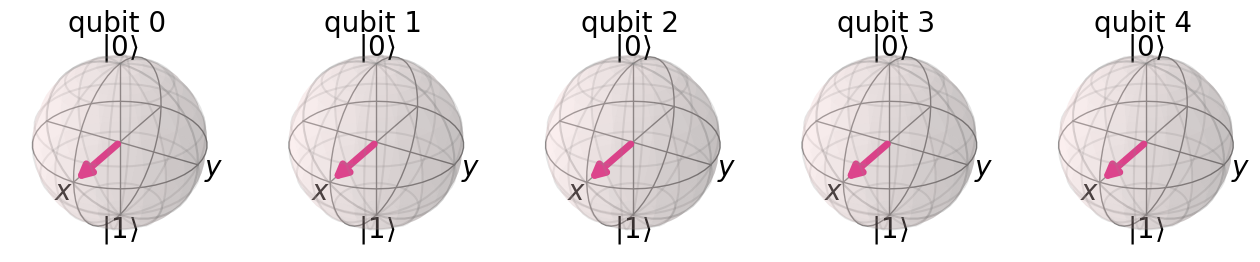

In [10]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [11]:
circuit.measure(q, c)
circuit.draw()

┌───┐┌─┐            
q0_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
q0_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
q0_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
q0_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
c0: 5/══════╩══╩══╩══╩══╩═
            0  1  2  3  4

In [12]:
apitoken = "8f84cb4cd160cd4c1ca646b369894917e3cb1cd76a7dfcb48cf76d5cd9a44e3a08c86c0e3a456c6a7b3d24de29d8e5d10972fd0dd9272631451066746885e1b4"
IBMQ.save_account(apitoken)

configrc.store_credentials:WARNING:2022-09-21 10:17:07,622: Credentials already present. Set overwrite=True to overwrite.


In [13]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
qcomp = provider.get_backend('ibmq_manila')
job = execute(circuit, backend=qcomp, shots=1000, memory=True) # memory=True

In [14]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [15]:
result = job.result()
counts = result.get_counts()

print(counts)

{'00000': 30, '00001': 26, '10000': 40, '10001': 29, '10010': 35, '10011': 25, '10100': 19, '10101': 26, '10110': 36, '10111': 34, '11000': 24, '11001': 41, '11010': 19, '11011': 34, '11100': 32, '11101': 20, '11110': 39, '11111': 25, '00010': 38, '00011': 32, '00100': 18, '00101': 39, '00110': 40, '00111': 27, '01000': 38, '01001': 33, '01010': 32, '01011': 31, '01100': 34, '01101': 31, '01110': 43, '01111': 30}


In [16]:
# from qiskit.tools.visualization import plot_histogram

# plot_histogram(counts)

In [17]:
# use memory
mem_real = result.get_memory()
print(mem_real)

# result_5bits_real = []
# for seq in mem_real:
#     result_5bits_real.append(int(seq[0])*16 + int(seq[1])*8 + int(seq[2])*4 + int(seq[3])*2 + int(seq[4])*1)
    
# print(result_5bits_real)

['00111', '01011', '11001', '11110', '10000', '01010', '01100', '10110', '10101', '10110', '11000', '01111', '00000', '10011', '11011', '00100', '00010', '10000', '10011', '11010', '00101', '00000', '01010', '01100', '10111', '01110', '00010', '10111', '10110', '11001', '01101', '11101', '00011', '11011', '00100', '11000', '11110', '00011', '10101', '01101', '10110', '01000', '11000', '10110', '00101', '00011', '01001', '01011', '01111', '00111', '01001', '11011', '01111', '10010', '10101', '10110', '00001', '00011', '10001', '00011', '11101', '01101', '11000', '10011', '01101', '11110', '00010', '10110', '11100', '11011', '10000', '10010', '01000', '01100', '00110', '11000', '11011', '10010', '01001', '10011', '00101', '00111', '01101', '00001', '10010', '01100', '01011', '11011', '11011', '01000', '01100', '00000', '11100', '11110', '00010', '00110', '00111', '00101', '01100', '01001', '00100', '01000', '00110', '11000', '00000', '10111', '01001', '11001', '11011', '01111', '10111', 

In [21]:
# b = ''
# for i in range(len(mem_real)):
# #     b = b + '000'
#     b = b + mem_real[i]
# print(b)

b = ''
for i in range(len(mem_real)):
    b = b + mem_real[i]
print(b)

0011101011110011111010000010100110010110101011011011000011110000010011110110010000010100001001111010001010000001010011001011101110000101011110110110010110111101000111101100100110001111000011101010110110110010001100010110001010001101001010110111100111010011101101111100101010110110000010001110001000111110101101110001001101101111100001010110111001101110000100100100001100001101100011011100100100110011001010011101101000011001001100010111101111011010000110000000111001111000010001100011100101011000100100100010000011011000000001011101001110011101101111101111001010010011100100101100101111010001111000000001011100111100111000000101011111010101110100100010010111100111011010010100001000010101110000110010111110111000110100111111100001100010001001100100000011100111110110010111110010011011001111010110110111100111111101100100100001000111000011010101001010111000000111100111100100000101000010110011000000111100101110011111111011110101001011111101001000011110011100101000110011001011011100001101001011110011

# Bonus (3 points)

# Bonus (5 points)